# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
#import warnings warnings.simple
#filter('ignore')
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [41]:
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

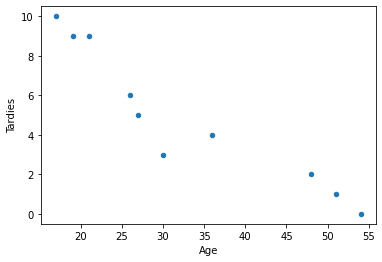

In [42]:
# Your code here.
student_data.plot(x='Age', y='Tardies', kind='scatter')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [43]:
# Your response here.

# There is an inverse linear correlation

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [44]:
# Your response here.

student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [45]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [46]:
# Correlation measures how much corraleted two variables are and the direction of that relation while covariance  give only the direction

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [47]:
# Your response here.

x = sm.add_constant(
    student_data[['Age'
    ]]
)

y = student_data['Tardies']

modelo = sm.OLS(y, x).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           5.57e-05
Time:                        05:45:49   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/home/brida/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [48]:
# What will be your outcome variable? 

# The outcome variable is Tardies

In [49]:
# What type of regression are you using?

# It is a simple linear regession

Plot your regression model on your scatter plot.

In [50]:
y = student_data['Tardies']

x =  student_data['Age']

linreg = linregress(x, y)

print(linreg)

LinregressResult(slope=-0.24282077091598084, intercept=12.88880336313577, rvalue=-0.9391626886887123, pvalue=5.56665383455336e-05, stderr=0.03139728816158602, intercept_stderr=1.1106388506135372)


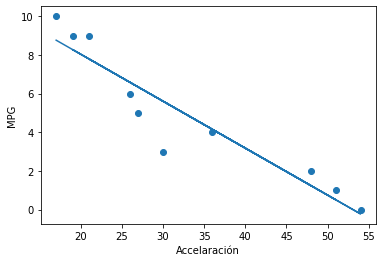

In [51]:
y_ = linreg[0]*x+linreg[1] # m*x+b

plt.plot(x, y_)
plt.scatter(x, y)
plt.xlabel('Accelaración')
plt.ylabel('MPG');

/home/brida/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Tardies'>

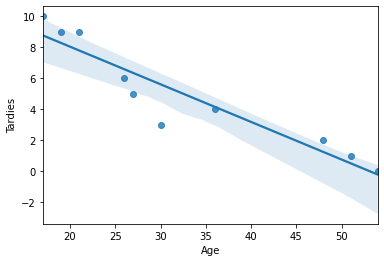

In [52]:
sns.regplot('Age', 'Tardies', data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [53]:
# Your response here. 

# The is a correlation coeficient of 0.88 which means that the two variables have a strong 
# relationship and the null hypothesis can be rejected since p value is less than 0.05

# Therefore, Age can be a good estimator of Tardines 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [54]:
# Import any libraries you may need & the data

In [55]:
vehicles = pd.read_csv('vehicles.csv')

In [56]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [57]:
vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [58]:
# Your response here. 

vehicles_corr = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

<AxesSubplot:>

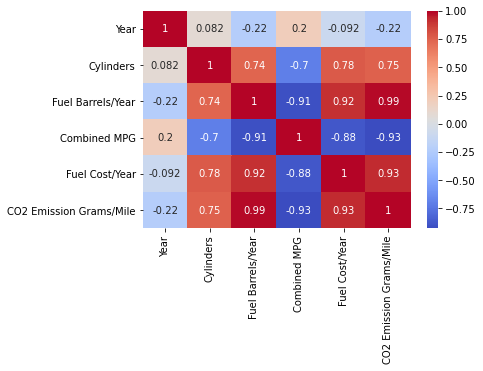

In [59]:
sns.heatmap(vehicles_corr.corr(), annot=True, cmap='coolwarm')

In [60]:
# Which variable do you think will be the most important in determining CO2 emissions?

# Fuel Barrels/Year is the important since it has a correlation 
# value of 0.99 with CO2 Emission.

#  Which provides the least amount of helpful information for determining CO2 emissions?

# In this case the Year is the least helpful to determine CO2 emission, 
# since it has correlation value of 0.22.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [61]:
# Your response here.

x = sm.add_constant(
    vehicles[['Cylinders', 'Fuel Barrels/Year', 
                   'Combined MPG', 'Fuel Cost/Year']]
)

y = vehicles['CO2 Emission Grams/Mile']

modelo = sm.OLS(y, x).fit()

print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 4.470e+05
Date:                     Sun, 03 Oct 2021   Prob (F-statistic):               0.00
Time:                             05:45:59   Log-Likelihood:            -1.5226e+05
No. Observations:                    35952   AIC:                         3.045e+05
Df Residuals:                        35947   BIC:                         3.046e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [62]:
# What type of regression are you using?

# A multi-variable linear regression

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [63]:
# Your response here. 

#The most important variables are Cylinders, Fuel Barrels/Year, Combined MPG,  Fuel Cost/Year

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [36]:
# Your code here. 
parties = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14],
                             'Y': [1, 2, 4, 4, 5, 7, 8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

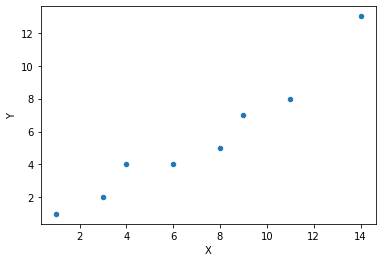

In [37]:
# Your code here.
parties.plot.scatter('X', 'Y')

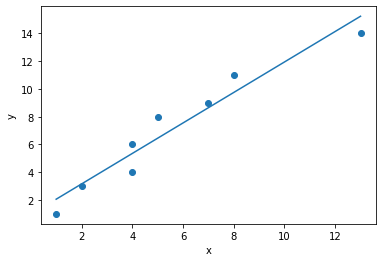

In [64]:
y = parties['X']

x =  parties['Y']

linreg = linregress(x, y)

y_ = linreg[0]*x+linreg[1] # m*x+b

plt.plot(x, y_)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [65]:
# Your response here. 
print(linreg)

LinregressResult(slope=1.0980392156862746, intercept=0.9607843137254894, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.12139984066017456, intercept_stderr=0.796071991989153)


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

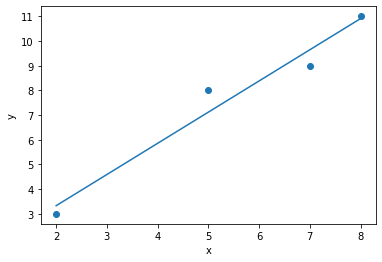

In [79]:
# Your response here. 
parties = parties.loc[parties['X'] != 14] 

y = parties['X']

x =  parties['Y']

linreg = linregress(x, y)

y_ = linreg[0]*x+linreg[1] # m*x+b

plt.plot(x, y_)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

In [80]:
print(linreg)

LinregressResult(slope=1.2619047619047619, intercept=0.8095238095238102, rvalue=0.9809769934083251, pvalue=0.019023006591674885, stderr=0.17657615445465868, intercept_stderr=1.0520738616802716)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [81]:
# Your response here. 

# The value of R squared improve since withou point x=14 the linear regression have a better fit
# To the other points. 